# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [76]:
# Set the API base URL
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather_json = requests.get(city_url)
    
    # Convert the API response to JSON format
    weather_json = weather_json.json()
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        temp = weather_json['main']['temp_max']
        city_max_temp = (temp - 273.15) * 9/5 + 32
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        timestamp = weather_json['dt']
        value = datetime.datetime.fromtimestamp(timestamp)
        city_date = f'{value:%Y-%m-%d %H:%M:%S}'

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port hedland
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | port hardy
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | tidore
City not found. Skipping...
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | west wendover
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | eskisehir
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | ribeira

In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port hedland,-20.3167,118.5667,78.854,57,71,9.26,AU,2022-11-06 20:47:34
1,ilulissat,69.2167,-51.1000,-2.830,94,39,3.11,GL,2022-11-06 20:44:14
2,puerto ayora,-0.7393,-90.3518,66.542,86,77,2.24,EC,2022-11-06 20:48:35
3,port hardy,50.6996,-127.4199,37.580,81,75,7.20,CA,2022-11-06 20:45:28
4,port macquarie,-31.4333,152.9167,69.890,61,71,4.45,AU,2022-11-06 20:45:13


In [79]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hedland,-20.3167,118.5667,78.854,57,71,9.26,AU,2022-11-06 20:47:34
1,ilulissat,69.2167,-51.1000,-2.830,94,39,3.11,GL,2022-11-06 20:44:14
2,puerto ayora,-0.7393,-90.3518,66.542,86,77,2.24,EC,2022-11-06 20:48:35
3,port hardy,50.6996,-127.4199,37.580,81,75,7.20,CA,2022-11-06 20:45:28
4,port macquarie,-31.4333,152.9167,69.890,61,71,4.45,AU,2022-11-06 20:45:13


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

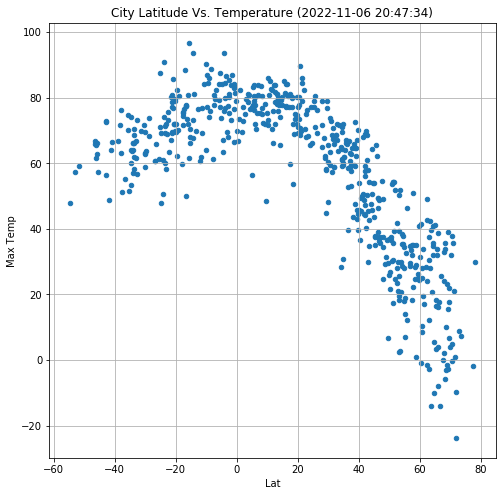

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
# print(city_data_df)
%matplotlib inline
value = city_data_df.iloc[0]['Date']
# value
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title=f"City Latitude Vs. Temperature ({value})")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

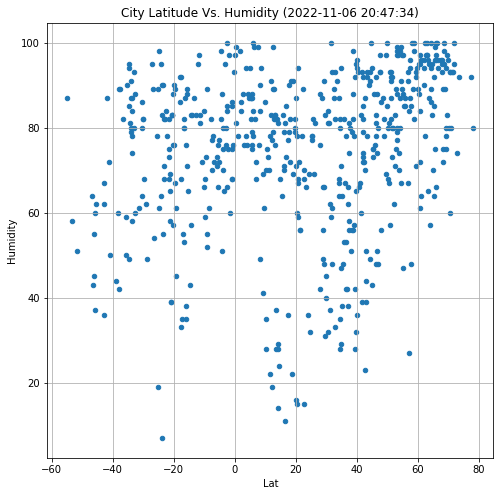

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title=f"City Latitude Vs. Humidity ({value})")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

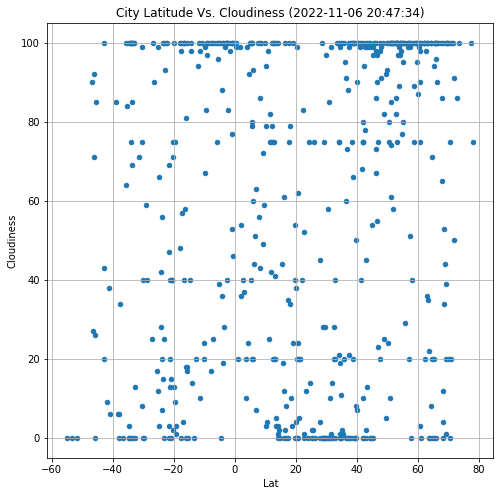

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title=f"City Latitude Vs. Cloudiness ({value})")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

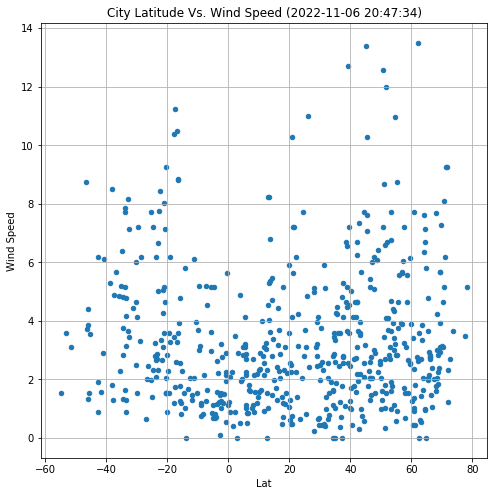

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title=f"City Latitude Vs. Wind Speed ({value})")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_linear_reg_plt(x_values,y_values,x_lbl,y_lbl,fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(8,8))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.annotate(line_eq,xy=(50, 50),xycoords='figure pixels',fontsize=15,color="red")
    # plt.annotate(line_eq,(x_values,y_values),fontsize=15,color="red")
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.savefig(f'output_data/Fig{fig}.png')
    print(f"The r-squared is: {rvalue**2}")
    print(line_eq)
    # Show plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df['Lat'] >= 0]
# Display sample data
print(len(northern_hemi_df))
northern_hemi_df.head()

395


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,-2.830,94,39,3.11,GL,2022-11-06 20:44:14
3,port hardy,50.6996,-127.4199,37.580,81,75,7.20,CA,2022-11-06 20:45:28
6,tuktoyaktuk,69.4541,-133.0374,6.800,78,20,5.66,CA,2022-11-06 20:48:36
8,yellowknife,62.4560,-114.3525,-1.444,78,20,3.60,CA,2022-11-06 20:44:01
10,west wendover,40.7391,-114.0733,45.608,66,100,4.12,US,2022-11-06 20:44:18


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df['Lat'] <0]
# Display sample data
print(len(southern_hemi_df))

# Display sample data
southern_hemi_df.head()

169


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hedland,-20.3167,118.5667,78.854,57,71,9.26,AU,2022-11-06 20:47:34
2,puerto ayora,-0.7393,-90.3518,66.542,86,77,2.24,EC,2022-11-06 20:48:35
4,port macquarie,-31.4333,152.9167,69.890,61,71,4.45,AU,2022-11-06 20:45:13
5,bluff,-46.6000,168.3333,65.804,64,90,8.74,NZ,2022-11-06 20:43:49
7,lebu,-37.6167,-73.6500,51.170,89,34,4.89,CL,2022-11-06 20:48:36


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7615794865580976
y = -1.08x + 92.4


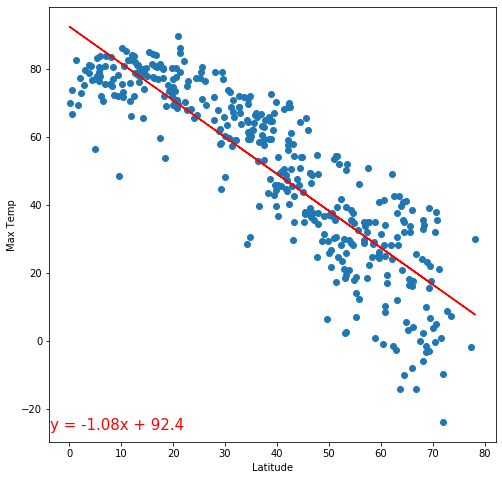

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Build the scatter plots for latitude vs. Temperature
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Max Temp',fig=5)

The r-squared is: 0.35418317679802924
y = 0.45x + 80.84


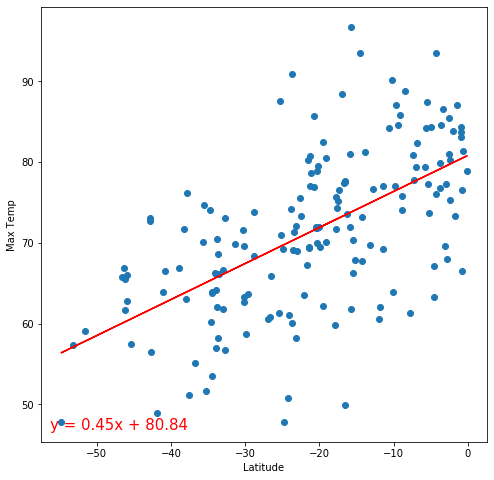

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Build the scatter plots for latitude vs. Temperature
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Max Temp',fig=6)

**Discussion about the linear relationship:** Northern Hemisphere has a stronger r value than the Southern Hemisphere.  The Southern Hemisphere has more variation between latitude and max temp. Northern Hemisphere has less variance. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08105449521510878
y = 0.28x + 64.69


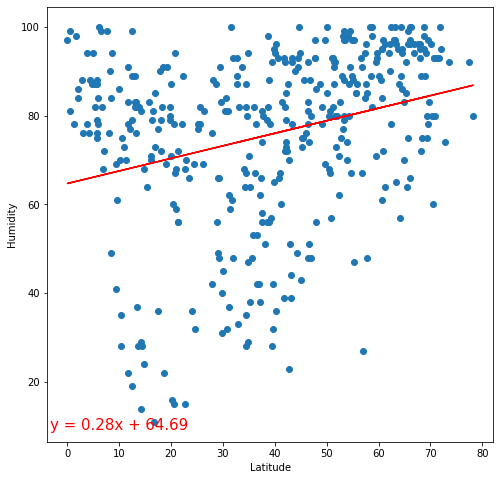

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Build the scatter plots for latitude vs. Humidity
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Humidity',fig=7)

The r-squared is: 0.04001954160748526
y = 0.26x + 77.49


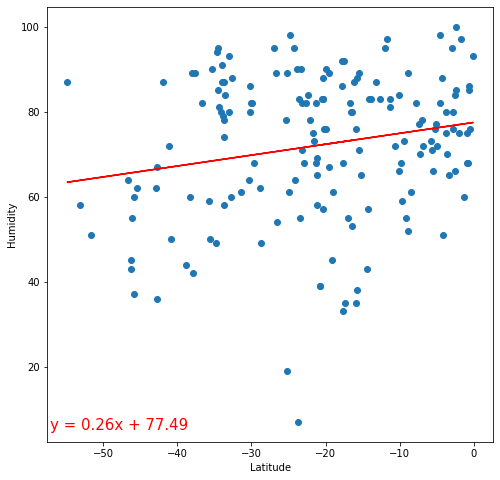

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Build the scatter plots for latitude vs. Humidity
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Humidity',fig=8)

**Discussion about the linear relationship:** There is next to no linear relationship for North/South Hemisphere between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.060489711743355934
y = 0.49x + 39.85


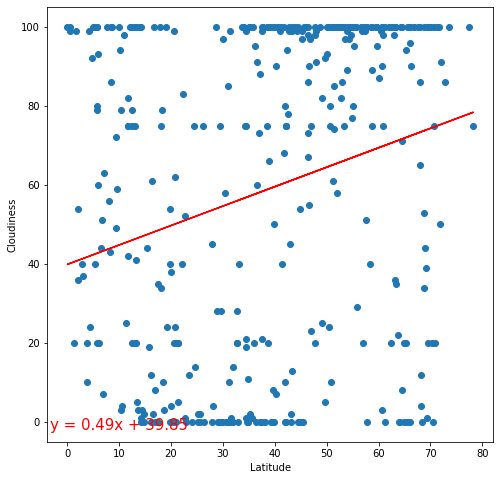

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Build the scatter plots for latitude vs. Cloudiness
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Cloudiness',fig=9)

The r-squared is: 0.09528104898651489
y = 0.93x + 75.21


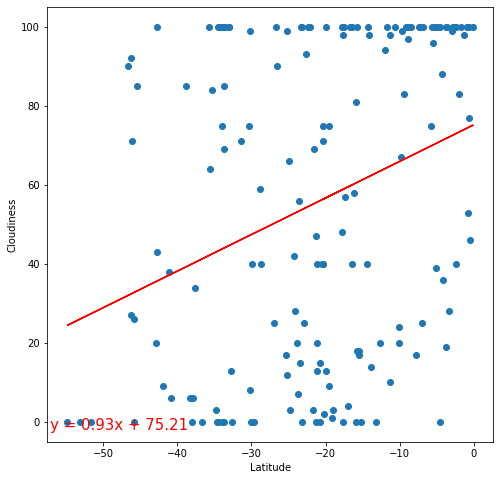

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Build the scatter plots for latitude vs. Cloudiness
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Cloudiness',fig=10)

**Discussion about the linear relationship:** There is next to no linear relationship for North/South Hemisphere between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03790144294931631
y = 0.02x + 2.34


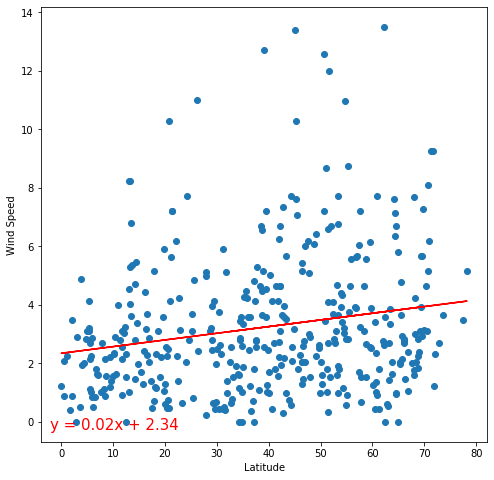

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Build the scatter plots for latitude vs. Wind Speed
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Wind Speed',fig=11)

The r-squared is: 0.06934161214276092
y = -0.05x + 2.45


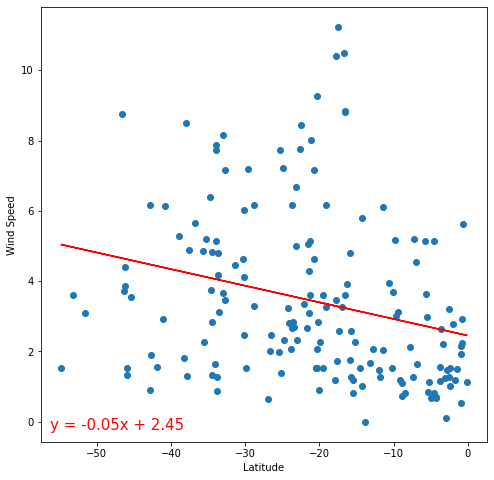

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Build the scatter plots for latitude vs. Wind Speed
create_linear_reg_plt(x_values,y_values,x_lbl='Latitude',y_lbl='Wind Speed',fig=12)

**Discussion about the linear relationship:** There is next to no linear relationship for North/South Hemisphere between wind speed and latitude.